In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib
%matplotlib inline

import torch
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import save_image
from torchvision.datasets import MNIST, CIFAR10

from sklearn import preprocessing, model_selection
from datetime import datetime
import calendar

import os
import gc
import sys

In [31]:
btc = pd.read_csv('data.csv')
btc = btc[:300]

tp = 7
sma = talib.SMA(btc['Tweet Count'], timeperiod = tp)
for i in range(tp):
    sma[i] = sma[tp - 1]

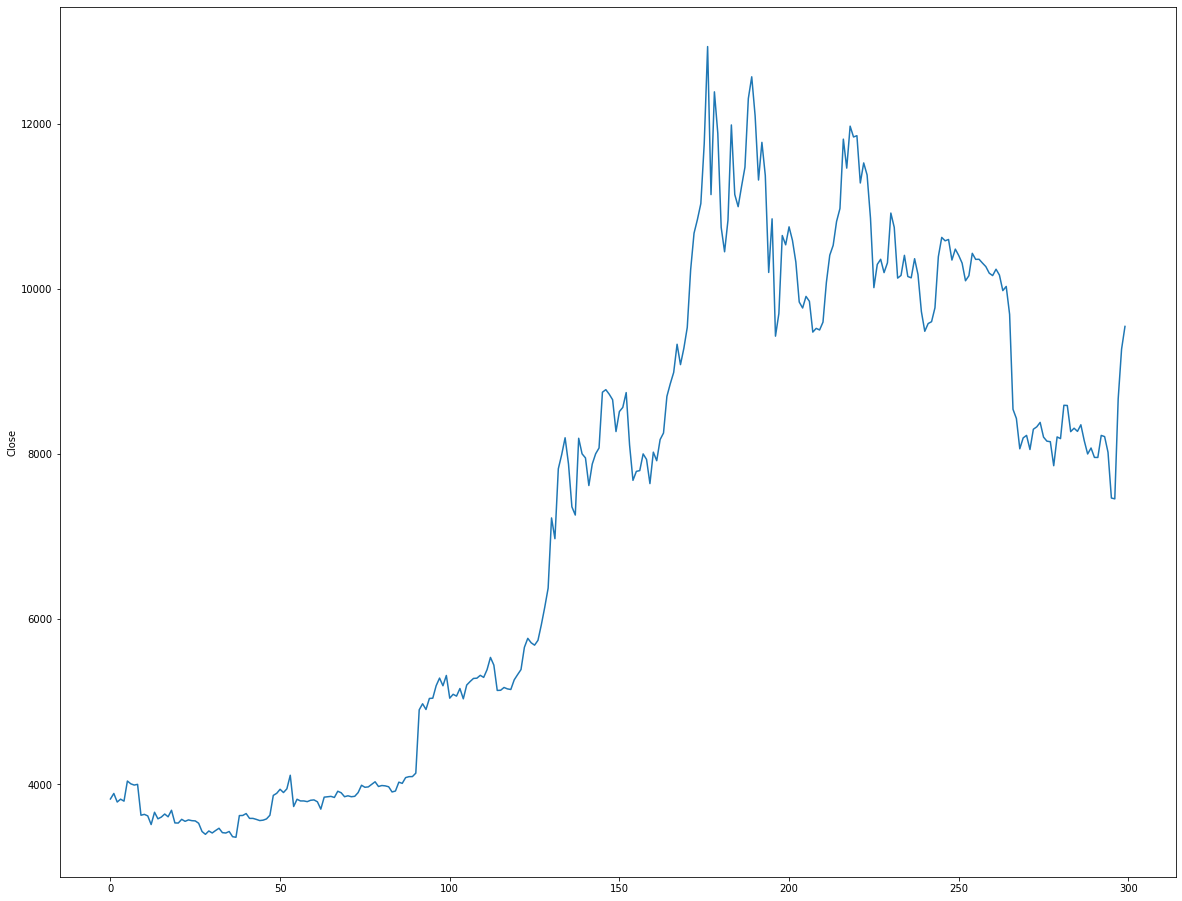

In [32]:
ax = plt.figure(figsize=(20,16))
sns.lineplot(x=range(len(btc)), y=btc['Close'])
plt.show()

In [33]:
btc.insert(0, 'Moving Average', sma)
btc['Moving Average'][:300] = sma

btc.head(10)

,Moving Average,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Tweet Count
0,24875.428571,2019-01-01,BTCUSD,3692.35,3840.85,3577.18,3823.63,3155.16,11667756.02,20625.0
1,24875.428571,2019-01-02,BTCUSD,3823.63,3911.99,3763.85,3890.45,3924.91,14998960.25,25778.0
2,24875.428571,2019-01-03,BTCUSD,3890.45,3894.17,3760.10,3786.91,4061.88,15562412.03,31982.0
3,24875.428571,2019-01-04,BTCUSD,3786.91,3850.30,3732.15,3821.47,2284.54,8642529.67,25433.0
4,24875.428571,2019-01-05,BTCUSD,3821.47,3859.50,3780.00,3797.41,1675.11,6408581.55,20714.0
5,24875.428571,2019-01-06,BTCUSD,3797.41,4079.04,3756.79,4041.01,2511.72,9969787.14,22299.0
6,24875.428571,2019-01-07,BTCUSD,4041.01,4069.96,3968.45,4007.47,3933.14,15810876.36,27297.0
7,25588.428571,2019-01-08,BTCUSD,4007.47,4112.12,3950.00,3992.24,4900.54,19684370.31,25616.0
8,25766.000000,2019-01-09,BTCUSD,3992.24,4044.82,3964.92,4000.67,3008.22,12062995.27,27021.0
9,25159.857143,2019-01-10,BTCUSD,4000.67,4034.61,3566.00,3626.76,6903.93,25909780.72,27739.0


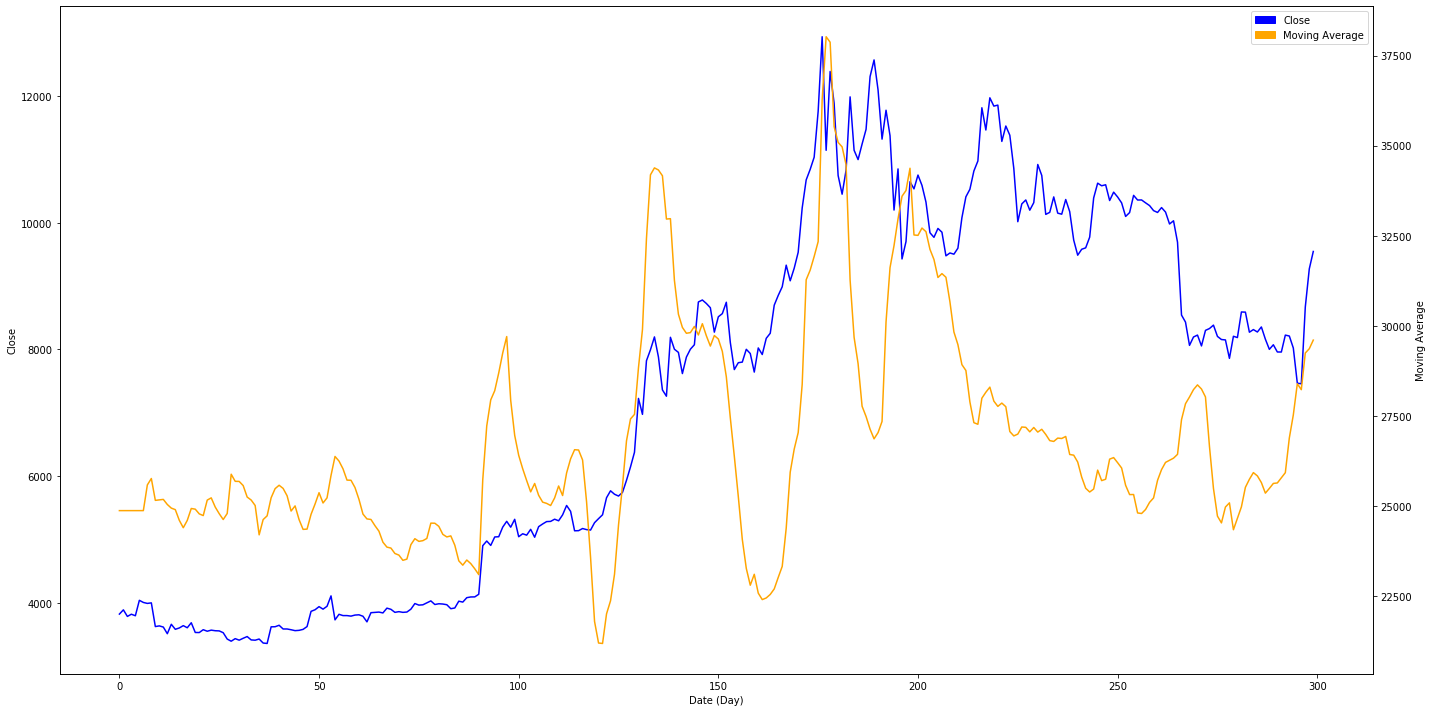

In [34]:
import matplotlib.patches as mpatches
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20,10
# Create plot
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date (Day)')
ax1.set_ylabel('Close')
plt.plot(btc['Close'], label = 'Close', color='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Moving Average')
a = plt.plot(btc['Moving Average'], label = 'Moving Average', color = 'orange')

# Create Legend
tweets = mpatches.Patch(color='blue', label='Close')
close = mpatches.Patch(color='orange', label='Moving Average')
plt.legend(handles=[tweets, close])

fig.tight_layout()
plt.show()

In [35]:
btc.drop('Symbol', axis=1, inplace=True)
btc.drop('Volume BTC', axis=1, inplace=True)
#btc.drop('Tweet Count', axis=1, inplace=True)
#btc.drop('Moving Average', axis=1, inplace=True)
#btc.drop('Volume USD', axis=1, inplace=True)

In [36]:
btc['Date'].head()

0    2019-01-01
1    2019-01-02
2    2019-01-03
3    2019-01-04
4    2019-01-05
Name: Date, dtype: object

In [37]:
def process_dates(df, column='Date', dform='%Y-%m-%d', year=True, month=True, day=True, weekday=True, inplace=False, drop_date=False):
    # Extracts desired features from date
    dates = df[column]
    
#     feature_dict = dict( (name,eval(name)) for name in ['year', 'month', 'day', 'weekday'] )
    
    date_dict = {'year': [], 'month': [], 'day': [], 'weekday': []}

#     for feature in feature_dict:
#         if feature_dict[feature] == True:
#             date_dict[feature] = []
    
    for i in range(len(df)):
        date = datetime.strptime(dates[i], dform)
        if year:
            date_dict['year'].append(date.year)
        if month:
            date_dict['month'].append(date.month)
        if day:
            date_dict['day'].append(date.day)
        if weekday:
            date_dict['weekday'].append(date.weekday())
    
    for feature in date_dict:
        if len(date_dict[feature]) == 0:
            del date_dict[feature]
            
    if drop_date:
        df.drop(column, inplace=True, axis=1)
    
    if inplace:
        for key in date_dict:
            df[key] = date_dict[key]
        return None
            
    return date_dict

In [38]:
process_dates(btc, inplace=True, drop_date=True)

In [39]:
# for key in btc_dates:
#     print(key, btc_dates[key][:9])

In [40]:
btc.head(10)

,Moving Average,Open,High,Low,Close,Volume USD,Tweet Count,year,month,day,weekday
0,24875.428571,3692.35,3840.85,3577.18,3823.63,11667756.02,20625.0,2019,1,1,1
1,24875.428571,3823.63,3911.99,3763.85,3890.45,14998960.25,25778.0,2019,1,2,2
2,24875.428571,3890.45,3894.17,3760.10,3786.91,15562412.03,31982.0,2019,1,3,3
3,24875.428571,3786.91,3850.30,3732.15,3821.47,8642529.67,25433.0,2019,1,4,4
4,24875.428571,3821.47,3859.50,3780.00,3797.41,6408581.55,20714.0,2019,1,5,5
5,24875.428571,3797.41,4079.04,3756.79,4041.01,9969787.14,22299.0,2019,1,6,6
6,24875.428571,4041.01,4069.96,3968.45,4007.47,15810876.36,27297.0,2019,1,7,0
7,25588.428571,4007.47,4112.12,3950.00,3992.24,19684370.31,25616.0,2019,1,8,1
8,25766.000000,3992.24,4044.82,3964.92,4000.67,12062995.27,27021.0,2019,1,9,2
9,25159.857143,4000.67,4034.61,3566.00,3626.76,25909780.72,27739.0,2019,1,10,3


In [41]:
# ax = plt.figure(figsize=(20,16))
# sns.heatmap(btc.corr())

In [42]:
# btc.head()

In [43]:
# for col in btc.columns:
#     sns.distplot(btc[col])
#     plt.show()

In [45]:
scaler = preprocessing.StandardScaler()
sa = scaler.fit_transform(btc)

In [46]:
sbtc = pd.DataFrame(sa, columns=btc.columns)

In [47]:
# for col in sbtc.columns:
#     sns.distplot(sbtc[col])
#     plt.show()

In [48]:
def create_series(df, col, out, inplace=False):
    
    if not inplace:
        df = df.copy()
    
    next_list = []
    for i in range(1, len(df)):
        next_list.append(df.iloc[i][col])
        
    df.drop(len(df) - 1, inplace=True)
    df[out] = next_list
    
    if not inplace:
        return df
    return None

In [49]:
sas = create_series(sbtc, 'Close', 'Target')

In [50]:
sas.head()

,Moving Average,Open,High,Low,Close,Volume USD,Tweet Count,year,month,day,weekday,Target
0,-0.633535,-1.227416,-1.199182,-1.256756,-1.190445,-0.317742,-1.266715,0.0,-1.571152,-1.669096,-1.007113,-1.167262
1,-0.633535,-1.181937,-1.175497,-1.188670,-1.167262,-0.113034,-0.213539,0.0,-1.571152,-1.554224,-0.506062,-1.203184
2,-0.633535,-1.158789,-1.181430,-1.190038,-1.203184,-0.078409,1.054441,0.0,-1.571152,-1.439351,-0.005011,-1.191194
3,-0.633535,-1.194658,-1.196036,-1.200233,-1.191194,-0.503647,-0.284051,0.0,-1.571152,-1.324479,0.496041,-1.199541
4,-0.633535,-1.182685,-1.192973,-1.182780,-1.199541,-0.640927,-1.248525,0.0,-1.571152,-1.209606,0.997092,-1.115028


In [51]:
#sas.drop('Volume BTC', inplace=True, axis=1)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# X_train, X_test, y_train, y_test = train_test_split(sas.drop('Target', axis=1), 
#                           sas['Target'], train_size=.3, random_state=101)

In [54]:
split = 240
y_col = 'Target'

X_train = sas.iloc[:split].drop(y_col, axis=1)
X_test = sas.iloc[split:].drop(y_col, axis=1)
y_train = sas.iloc[:split][y_col]
y_test = sas.iloc[split:][y_col]

In [55]:
X_train = torch.from_numpy(X_train.values.astype(np.float32))
X_test = torch.from_numpy(X_test.values.astype(np.float32))
y_train = torch.from_numpy(y_train.values.astype(np.float32))
y_test = torch.from_numpy(y_test.values.astype(np.float32))

In [56]:
class lnn(nn.Module):
    def __init__(self, in_dim, l1, l2, l3, l4, out_dim):
        super(lnn, self).__init__()
        self.l1 = nn.Linear(in_dim, l1)
        self.l2 = nn.Linear(l1, l2)
        self.l3 = nn.Linear(l2, l3)
        self.l4 = nn.Linear(l3, l4)
        self.l5 = nn.Linear(l4, out_dim)
        
    def forward(self, x):
        x = F.selu(self.l1(x))
        x = F.selu(self.l2(x))
        x = F.selu(self.l3(x))
        x = F.selu(self.l4(x))
        x = F.selu(self.l5(x))
        return x

In [57]:
learning_rate = .01
num_epochs = 1200
show_num = num_epochs/5

In [58]:
%%time

model = lnn(11, 75, 150, 75, 10, 1)

model = model

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=.9)

for epoch in range(num_epochs):

    running_loss = 0.0

    if torch.cuda.is_available():
        NX_train = Variable(X_train).cuda()
        Ny_train = Variable(y_train).cuda()
    else:
        NX_train = Variable(X_train)
        Ny_train = Variable(y_train)
        

    out = model(NX_train)
    loss = criterion(out, Ny_train.view(out.size(0), -1))
    
    running_loss += loss.item() * Ny_train.size(0)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    
    if (epoch + 1) % show_num == 0:
        print('epoch {}'.format(epoch + 1))
        print('*' * 10)
        print('Finish {} epoch, Loss: {:.6f}'.format(
            epoch + 1, running_loss / (len(X_train))))
        
    model.eval()
    eval_loss = 0.

    with torch.no_grad():
        if torch.cuda.is_available():
            NX_test = Variable(X_test).cuda()
            Ny_test = Variable(y_test).cuda()
        else:
            NX_test = Variable(X_test)
            Ny_test = Variable(y_test)
    
    out = model(NX_test)
    loss = criterion(out, Ny_test.view(out.size(0), -1))
    eval_loss += loss.item() * Ny_test.size(0)
    
    if (epoch + 1) % show_num == 0:
        print('Test Loss: {:.6f}'.format(eval_loss / (len(X_test))))
        print('Overfit ratio {:.6f}'.format((eval_loss / (len(X_test)))/
                                            (running_loss / (len(X_train)))))
        print()

epoch 240
**********
Finish 240 epoch, Loss: 0.014643
Test Loss: 0.055883
Overfit ratio 3.816377

epoch 480
**********
Finish 480 epoch, Loss: 0.008922
Test Loss: 0.027143
Overfit ratio 3.042103

epoch 720
**********
Finish 720 epoch, Loss: 0.006562
Test Loss: 0.018337
Overfit ratio 2.794356

epoch 960
**********
Finish 960 epoch, Loss: 0.005248
Test Loss: 0.017111
Overfit ratio 3.260721

epoch 1200
**********
Finish 1200 epoch, Loss: 0.004234
Test Loss: 0.017865
Overfit ratio 4.219246

CPU times: user 14.9 s, sys: 592 ms, total: 15.5 s
Wall time: 6.54 s


In [62]:
sclose = sbtc['Close'].drop(len(sbtc) - 1)
tinput = torch.from_numpy(sas.drop('Target', axis=1).values.astype(np.float32))
toutput = model(tinput)
noutput = toutput.detach().cpu().numpy()
loutput = []

for i in range(len(noutput)):
    loutput.append(noutput[i][0])

loutput = pd.Series(loutput)

close = btc['Close'].drop(len(btc) - 1)
scaled_temp = sbtc.copy()
scaled_temp['Close'] = loutput
unscaled_temp = scaler.inverse_transform(scaled_temp)
unscaled_temp = pd.DataFrame(unscaled_temp, columns=sbtc.columns)
unscaled_pred = unscaled_temp['Close']
unscaled_pred.drop(len(unscaled_pred) - 1, inplace=True)

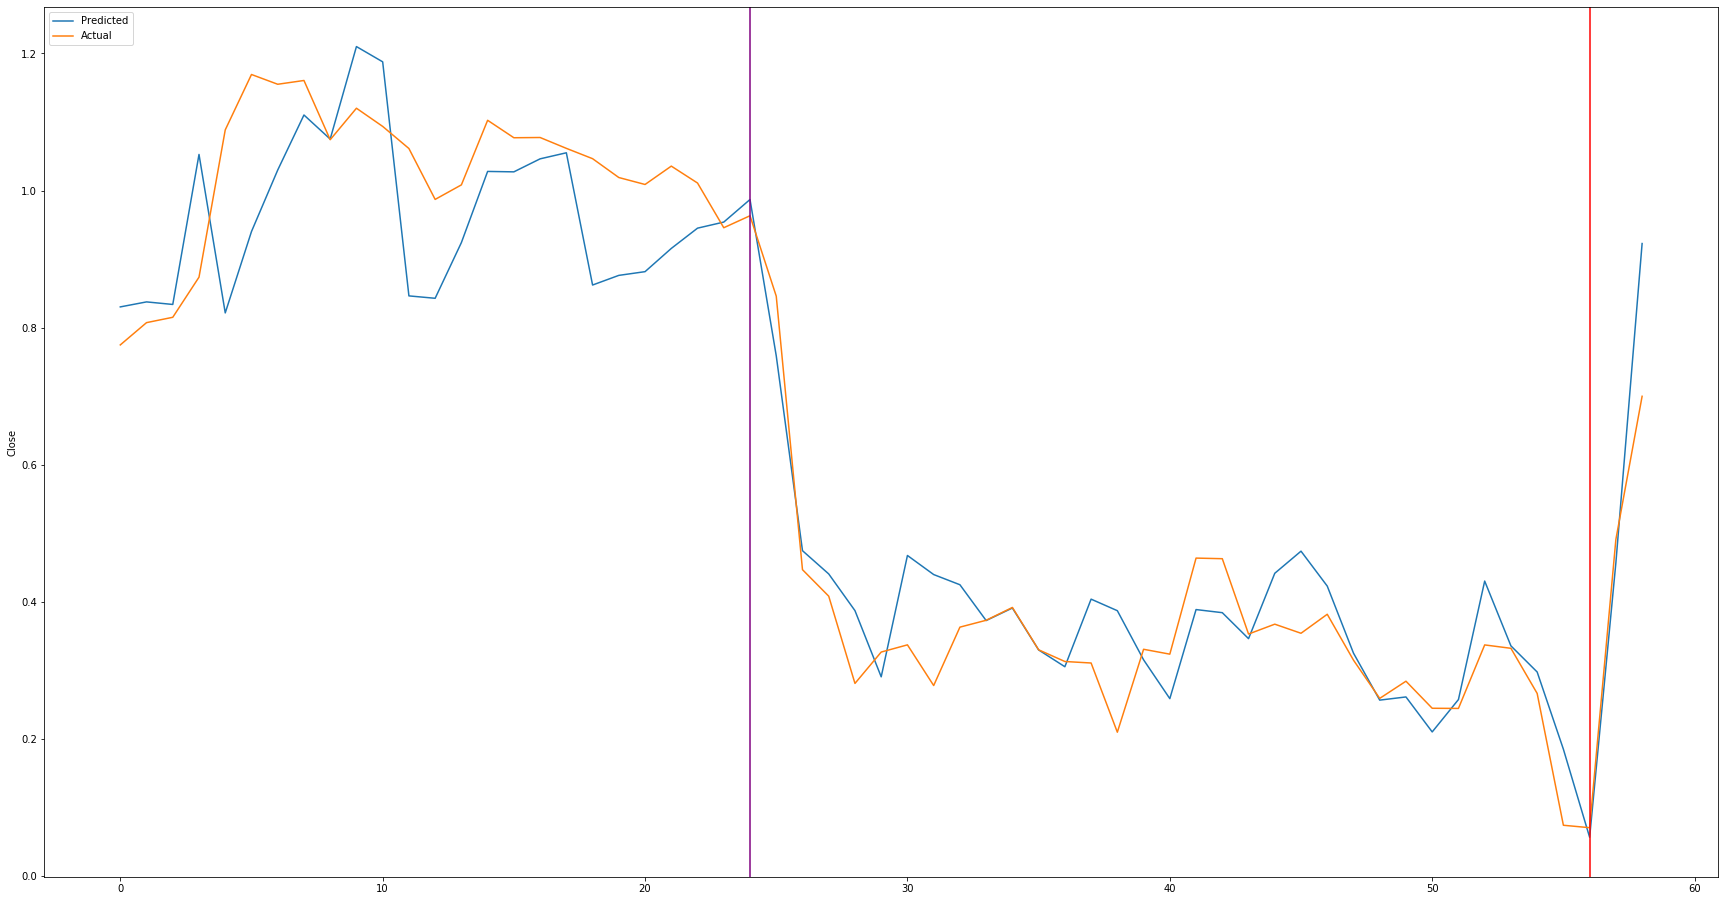

In [63]:
want_all = 0

if want_all:
    segment = len(sclose)
    ax = plt.figure(figsize=(30,16))
    sns.lineplot(x=range(segment), y=loutput[-1 * segment:])
    sns.lineplot(x=range(segment), y=sclose[-1 * segment:])
    plt.axvline(x=split)
    
    plt.legend(['Predicted', 'Actual'], loc='upper left')
else:
    segment = len(sclose) - split
    ax = plt.figure(figsize=(30,16))
    sns.lineplot(x=range(segment), y=loutput[-1 * segment:])
    sns.lineplot(x=range(segment), y=sclose[-1 * segment:])
    plt.axvline(x = 24, color='purple')
    plt.axvline(x = 56, color='red')
    plt.legend(['Predicted', 'Actual'], loc='upper left')

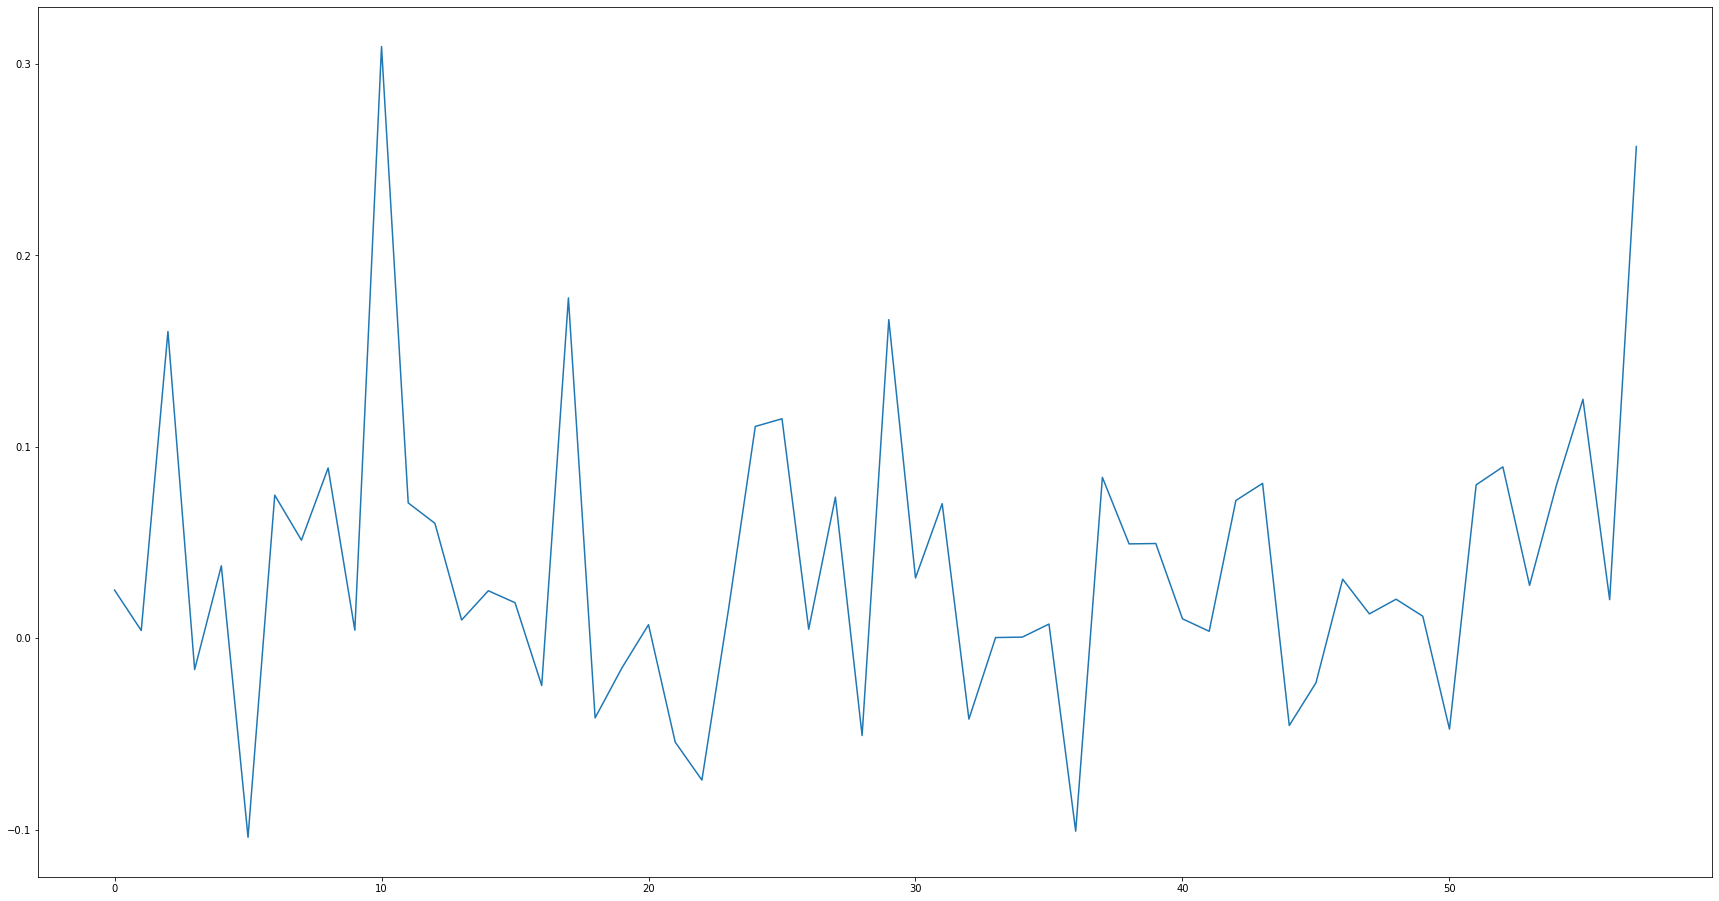

In [64]:
predicted = loutput[-1 * segment:]
actual = sclose[-1 * segment:]

actual_ratio = []
predicted_ratio = []
#for i in range(240, 299):
#    actual_ratio.append(actual[i] / actual[i-1])
#    predicted_ratio.append(predicted[i]/predicted[i-1])
#    actual_ratio = actual_ratio - predicted_ratio

for i in range(241, 299):
    a = actual[i] - actual[i-1]
    p = predicted[i] - predicted[i-1]
    if (a > 0 and p > 0) or (a < 0 and p < 0):
        actual_ratio.append(abs(a - p))
    else:
        actual_ratio.append(a - abs(p))

plt.figure(figsize=(30,16))
#plt.plot(prediction_accuracy)
plt.plot(actual_ratio)

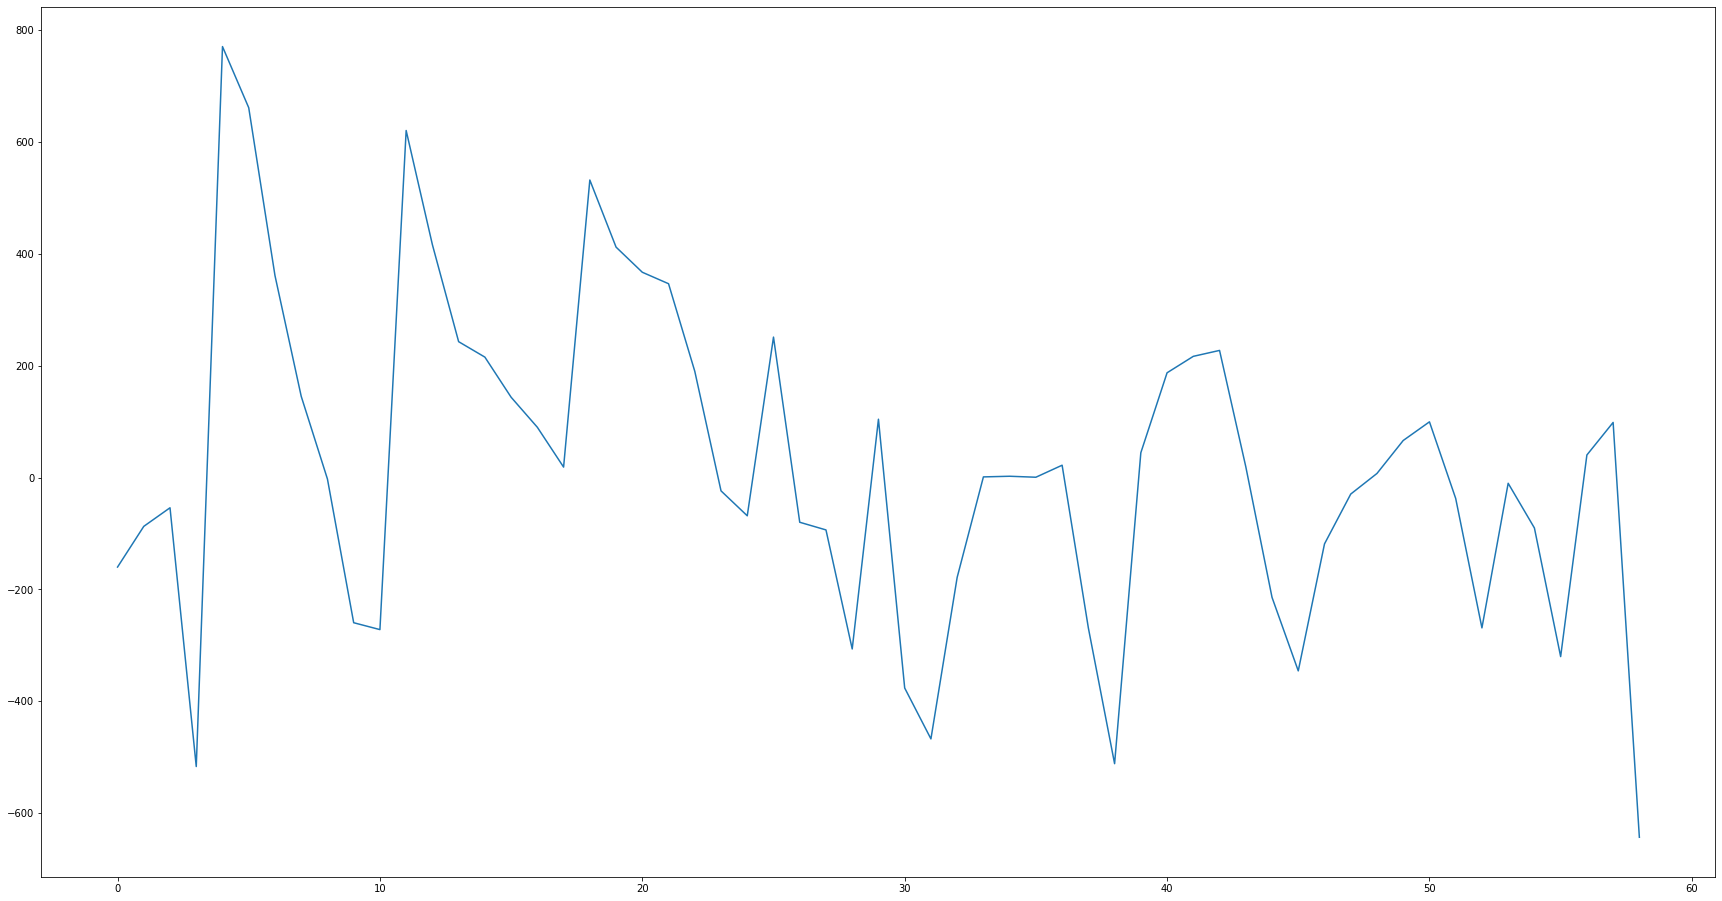

In [65]:
segment = len(sclose) - split
price_resid = (sclose[-1 * segment:] - loutput[-1 * segment:]) * btc['Close'].std()

ax = plt.figure(figsize=(30,16))
sns.lineplot(x=range(segment), y=price_resid)

In [66]:
good_slice = 60
z = 2.576

std = price_resid.iloc[:good_slice].std()
print('std price:', round(std, 3))
print('99% conf in price:', round(z * (1/(good_slice**(1/2))), 3))
print('99% conf interval:', (round(std - z * (1/good_slice**(1/2)), 3)), ',',  round((std + z * (1/good_slice**(1/2))), 3))

good_part = loutput[split:(split + good_slice)]
real_part = sclose[split:(split + good_slice)]

good_loss = sum((good_part - real_part)**2)/len(good_part)
print('Test loss on good slice:', round(good_loss, 6))
print('Overfit ratio on good slice:', round(good_loss/(running_loss / (len(X_train))), 6))

std price: 290.631
99% conf in price: 0.333
99% conf interval: 290.298 , 290.964
Test loss on good slice: 0.010004
Overfit ratio on good slice: 2.362724


In [68]:
segment = len(sclose) - split
ax = plt.figure(figsize=(30,16))
sns.lineplot(x=range(good_slice), y=loutput[-1 * segment: (-1 * segment) + good_slice])
sns.lineplot(x=range(good_slice), y=sclose[-1 * segment: (-1 * segment) + good_slice])

ValueError: array length 60 does not match index length 0

<Figure size 2160x1152 with 0 Axes>

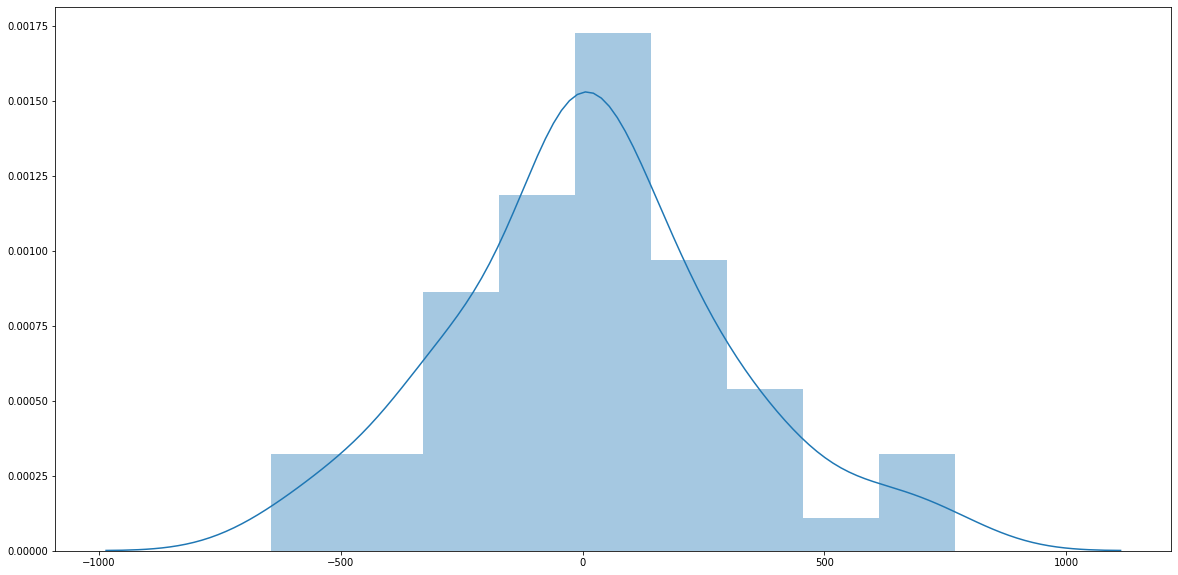

In [69]:
sns.distplot(price_resid.iloc[:good_slice])

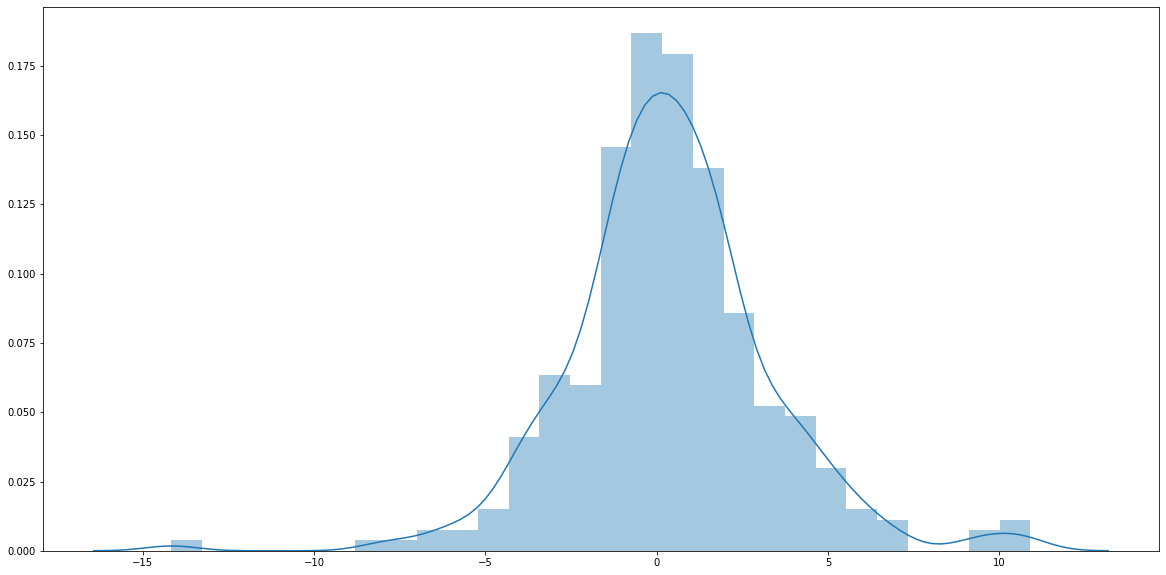

In [70]:
# Compare unscaled_pred and close
percent_off = []

for real_close, pred_close in zip(close, unscaled_pred):
    percent_off.append(((pred_close - real_close)/real_close)*100)
    
percent_off = pd.Series(percent_off)
sns.distplot(percent_off)

In [71]:
print('mean:', percent_off.mean())
print('std:', percent_off.std())

mean: 0.38617279380435027
std: 2.9582636592479137


/Users/myleshayes/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/myleshayes/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/myleshayes/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


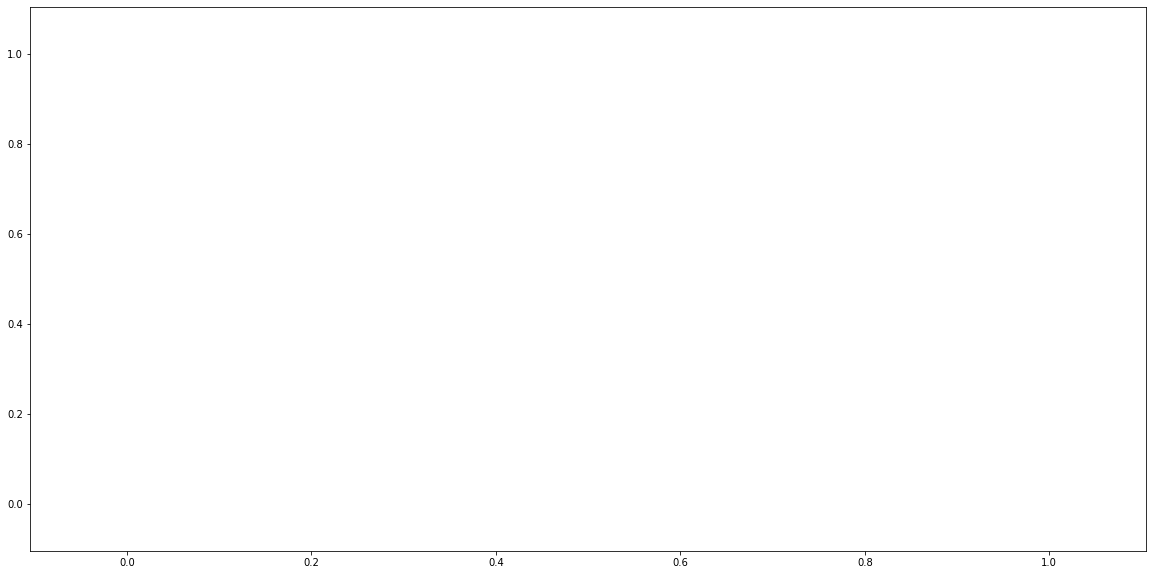

In [72]:
# Compare unscaled_pred and close in in good part
start_of_good = -1 * segment
end_of_good = (-1 * segment) + good_slice

good_percent_off = []

for real_close, pred_close in zip(close[start_of_good:end_of_good], unscaled_pred[start_of_good:end_of_good]):
    good_percent_off.append(((pred_close - real_close)/real_close)*100)
    
good_percent_off = pd.Series(good_percent_off)
sns.distplot(good_percent_off)

In [73]:
print('mean:', good_percent_off.mean())
print('std:', good_percent_off.std())

mean: nan
std: nan
